In [412]:
import cv2
import matplotlib.pyplot as pyplot
import numpy as np

In [413]:
image = cv2.imread('./Screenshot from 2023-06-02 13-10-20.png')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./template_1.png', cv2. IMREAD_GRAYSCALE)
template_1 = cv2.imread('./template_1.png')
template_2 = cv2.imread('./template_2.png')
template_3 = cv2.imread('./template_3.png')

w, h = template.shape[::-1]
treshold=0.9


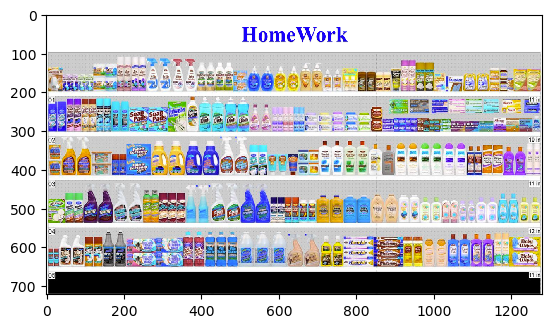

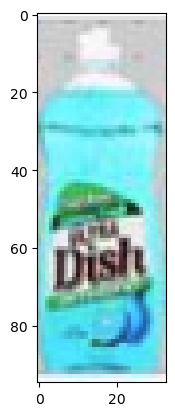

In [414]:
pyplot.imshow(image)
pyplot.show()
pyplot.imshow(template_1)
pyplot.show()


In [415]:
def NMS(boxes, overlapThresh = 0.999999999999999999999999999999995):
    #return an empty list, if no boxes given
    if len(boxes) == 0:
        return []
    x1 = boxes[:, 0]  # x coordinate of the top-left corner
    y1 = boxes[:, 1]  # y coordinate of the top-left corner
    x2 = boxes[:, 2]  # x coordinate of the bottom-right corner
    y2 = boxes[:, 3]  # y coordinate of the bottom-right corner
    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    areas = (x2 - x1 + 1) * (y2 - y1 + 1) # We have a least a box of one pixel, therefore the +1
    indices = np.arange(len(x1))
    for i,box in enumerate(boxes):
        temp_indices = indices[indices!=i]
        xx1 = np.maximum(box[0], boxes[temp_indices,0])
        yy1 = np.maximum(box[1], boxes[temp_indices,1])
        xx2 = np.minimum(box[2], boxes[temp_indices,2])
        yy2 = np.minimum(box[3], boxes[temp_indices,3])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / areas[temp_indices]
       
        if np.any(overlap) > overlapThresh:
            print("this is overlap",overlap)
            print("result \n",np.any(overlap) > overlapThresh)
            print("overlap thresh",overlapThresh)
            indices = indices[indices != i]
    print("boxes after geting cut",boxes[indices])
    return boxes[indices].astype(int)

def bounding_boxes(image, template):
    (tH, tW) = template.shape[:2]             # getting height and width of template 
    imageGray = cv2.cvtColor(image, 0)        # convert the image to grayscale
    templateGray = cv2.cvtColor(template, 0)  # convert the template to grayscale

    result = cv2.matchTemplate(imageGray, templateGray, cv2.TM_CCOEFF_NORMED)  # template matching return the correlatio 
    pyplot.imshow(result)
    pyplot.show()
    (y1, x1) = np.where(result >= treshold)  # object is detected, where the correlation is above the treshold
    print("x1 and y1",x1,y1)
    boxes = np.zeros((len(y1), 4))      # construct array of zeros
    x2 = x1 + tW                       # calculate x2 with the width of the template
    y2 = y1 + tH                       # calculate y2 with the height of the template
    # fill the bounding boxes array
    boxes[:, 0] = x1                 
    boxes[:, 1] = y1
    boxes[:, 2] = x2
    boxes[:, 3] = y2
    return boxes.astype(int)


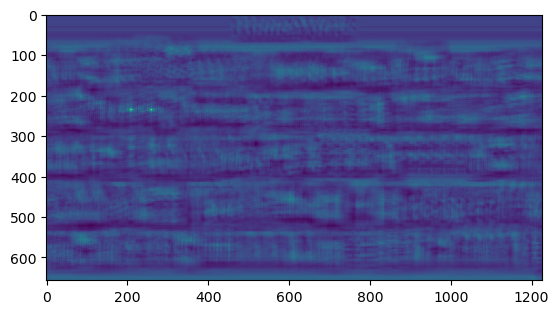

x1 and y1 [210 260] [236 236]
inside for
inside for
number of products 2


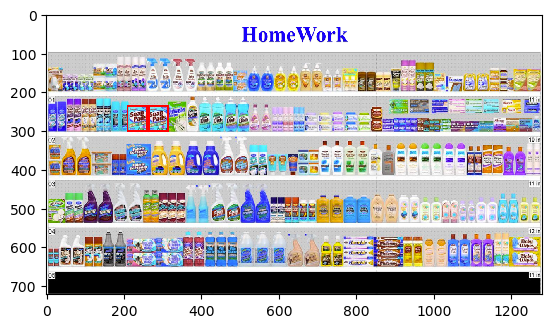

In [416]:
boxes_redundant = bounding_boxes(image, template_3) # calculate bounding boxes

                                          # remove redundant bounding boxes
# boxes = NMS(boxes_redundant)                                            # remove redundant bounding boxes

# overlapping_BB_image = draw_bounding_boxes(image,boxes_redundant)  # draw image with all redundant bounding boxes
# segmented_image = draw_bounding_boxes(image,boxes)           # draw the bounding boxes onto the image
# print(boxes)
i=0
for box in boxes_redundant:
        print("inside for")
        i=i+1
        x1,y1=box[:2]
        x2,y2=box[2:]
        image = cv2.rectangle(image,(x1,y1), (x2,y2), (255,0,0), 3)
print("number of products",i)
pyplot.imshow(image)
pyplot.show()

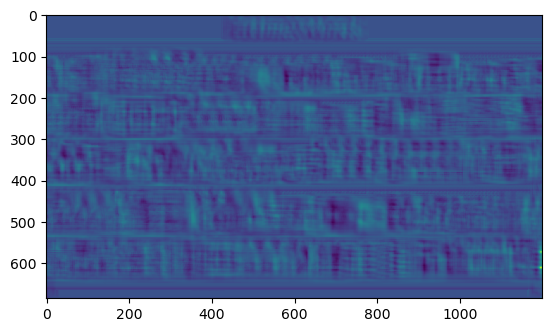

x1 and y1 [1197 1197] [573 611]
inside for
inside for


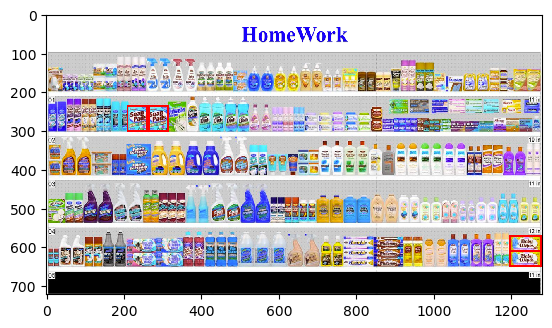

In [417]:
boxes_redundant = bounding_boxes(image, template_2) # calculate bounding boxes

                                          # remove redundant bounding boxes
# boxes = NMS(boxes_redundant)                                            # remove redundant bounding boxes

# overlapping_BB_image = draw_bounding_boxes(image,boxes_redundant)  # draw image with all redundant bounding boxes
# segmented_image = draw_bounding_boxes(image,boxes)           # draw the bounding boxes onto the image
# print(boxes)
for box in boxes_redundant:
        print("inside for")
        x1,y1=box[:2]
        x2,y2=box[2:]
        image = cv2.rectangle(image,(x1,y1), (x2,y2), (255,0,0), 3)
pyplot.imshow(image)
pyplot.show()